In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
from scipy.linalg import sqrtm
from copy import deepcopy
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
## load data
train = pd.read_csv('products.csv')
test = pd.read_csv('sampleSubmission.csv')

C:\Anaconda3\envs\aind-dog-copy\lib\site-packages\IPython\core\interactiveshell.py:2717: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
## fill missing values
#products['customerID'].fillna('BBID_0000', inplace=True)
train['promotion_description'].fillna('no_promo', inplace=True)
train['Gender'].fillna('no_gender', inplace=True)
train['State'].fillna('no_state', inplace=True)
train['PinCode'].fillna(-1, inplace=True)
train['DOB'].fillna("1", inplace=True)

In [4]:
#handling missing data for product_code
train = train[np.isfinite(train['product_code'])]

In [5]:
state_dict = {'MADHY PRADESH':'MADHYA PRADESH', 'TAMILNADU':'TAMIL NADU', 'MADHYA  PRADESH':'MADHYA PRADESH', 'HARAYANA':'HARYANA',
             'Jharkhand':'JHARKHAND','Tamilnadu':'TAMIL NADU','Tamil Nadu':'TAMIL NADU','Madhya Pradesh':'MADHYA PRADESH',
             'REST OF WEST BENGAL':'WEST BENGAL', 'west bengal':'WEST BENGAL','Uttar Pradesh':'UTTAR PRADESH', 'Delhi':'DELHI',
             'Bhopal':'BHOPAL','CHHATISGARH':'CHHATTISGARH','CHATTISGARH':'CHHATTISGARH', 'jharkhand':'JHARKHAND','Chandigarh':'CHANDIGARH',
             'UTTAR PRADESH WEST': 'UTTAR PRADESH','ODISHA':'ORISSA','MAHARASTRA':'MAHARASHTRA','madhya pradesh':'MADHYA PRADESH',
             'KARNATAK':'KARNATAKA','JAMMU and KASHMIR':'JAMMU AND KASHMIR','JAMMU KASHMIR':'JAMMU AND KASHMIR','Rajasthan':'RAJASTHAN',
             'east singhbhum':'JHARKHAND', 'ORRISA':'ORISSA','Andhra Pradesh':'ANDHRA PRADESH', 'UTTARANCHAL':'UTTARAKHAND',
             'Uttar pradesh':'UTTAR PRADESH','Maharashtra':'MAHARASHTRA','MP':'MADHYA PRADESH', 'UTTAR PRADESH EAST':'UTTAR PRADESH',
             'Punjab':'PUNJAB','maharashtra':'MAHARASHTRA','Karnataka':'KARNATAKA','M.P.':'MADHYA PRADESH','DAMAN':'DAMAN AND DIU',
             'HUBLI':'KARNATAKA','Tamil nadu':'TAMIL NADU','GUJRAT':'GUJARAT', 'Mp':'MADHYA PRADESH','Madhya pradesh':'MADHYA PRADESH',
             'West Bengal':'WEST BENGAL','Gujarat':'GUJARAT','UP':'UTTAR PRADESH','Chennai':'CHENNAI', 'm.p.':'MADHYA PRADESH',
             'kerala':'KERALA'}

In [6]:
train.replace({"State": state_dict}, inplace=True)

In [7]:
train.State.value_counts()

MADHYA PRADESH                 2045920
KARNATAKA                      1592547
no_state                       1047578
JHARKHAND                      1039685
TAMIL NADU                      949943
PUNJAB                          761524
MAHARASHTRA                     111914
WEST BENGAL                      79330
UTTAR PRADESH                    66725
DELHI                            40875
ORISSA                           34717
BIHAR                            32426
ANDHRA PRADESH                   31484
RAJASTHAN                        25114
GUJARAT                          24469
HARYANA                          23568
CHHATTISGARH                     23121
KERALA                           12050
x                                 6556
GOA                               5500
ASSAM                             5261
HIMACHAL PRADESH                  4759
UTTARAKHAND                       3621
DUMMY                             3451
JAMMU AND KASHMIR                 1474
CHANDIGARH               

In [8]:
train = train[train['State'] != ('x', 'aaaaa', 'asr')]

In [9]:
cnt_srs = train['product_code'].astype('int64').value_counts().reset_index().head(100)
#cnt_srs = products['product_code'].value_counts().reset_index()
cnt_srs.columns = ['product_code', 'frequency_count']
cnt_srs

,product_code,frequency_count
0,300776411,60994
1,300776410,58437
2,108037568,51338
3,300785148,41500
4,108100382,35259
5,300785150,34794
6,300840018,31149
7,108100362,27963
8,108005676,27727
9,300111517,25360


In [10]:
prod_index = []
for i in cnt_srs['product_code']:
    prod_index.append(i)

In [11]:
product_joined = pd.merge(train, cnt_srs, on='product_code', how='inner')
products_less = product_joined[['customerID', 'Gender','State','product_code']].reset_index()
products_less.drop('index', axis=1, inplace=True)
products_to_join = pd.DataFrame(train['customerID']).reset_index()
products_to_join.drop('index', axis=1, inplace=True)

In [12]:
# Join the dummy variables to the main dataframe
train = pd.merge(products_to_join, products_less.drop_duplicates(subset=['customerID'], keep='last'), on='customerID', how='left')
train.head()

,customerID,Gender,State,product_code
0,BBID_2041,male,no_state,1.081e+08
1,BBID_2041,male,no_state,1.081e+08
2,BBID_2041,male,no_state,1.081e+08
3,BBID_2041,male,no_state,1.081e+08
4,BBID_2041,male,no_state,1.081e+08


In [13]:
train.dropna(inplace=True)

In [14]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7821602 entries, 0 to 7981241
Data columns (total 4 columns):
customerID      object
Gender          object
State           object
product_code    object
dtypes: object(4)
memory usage: 298.4+ MB


In [15]:
cnt_srs_state = train['State'].value_counts().reset_index().head(18)

In [16]:
cnt_srs_state['index']

0     MADHYA PRADESH
1          KARNATAKA
2           no_state
3          JHARKHAND
4         TAMIL NADU
5             PUNJAB
6        MAHARASHTRA
7        WEST BENGAL
8      UTTAR PRADESH
9              DELHI
10            ORISSA
11             BIHAR
12    ANDHRA PRADESH
13         RAJASTHAN
14           GUJARAT
15           HARYANA
16      CHHATTISGARH
17            KERALA
Name: index, dtype: object

In [17]:
train = train.loc[train['State'].isin(cnt_srs_state['index'])]

In [18]:
train = pd.DataFrame(train['product_code'])

In [19]:
train.head()

,product_code
0,1.081e+08
1,1.081e+08
2,1.081e+08
3,1.081e+08
4,1.081e+08


In [20]:
prod_dict = {'_'}

#train = pd.get_dummies(train, columns=['product_code', 'Gender', 'State'], prefix=['_', '_','_'])
train = pd.get_dummies(train, columns=['product_code'], prefix=['_'])
train.columns=train.columns.str.replace('_','')
train.reset_index(drop=True).head()

,100105505.0,108000537.0,108000568.0,108000707.0,108001125.0,108001127.0,108003448.0,108003451.0,108004423.0,108004880.0,...,300808923.0,300840018.0,300942704.0,300974316.0,300974360.0,500096181.0,1000010411.0,1000058092.0,1000336252.0,1000609658.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [21]:
#from sklearn.preprocessing import LabelEncoder

#le = LabelEncoder()
#le.fit(train['Gender'])
#list(le.classes_)
#train['Gender'] = le.transform(train['Gender']) 
#train_pca = train.iloc[:,1:]

train_pca = train.copy()


In [22]:
from IPython.display import display

# TODO: Select three indices of your choice you wish to sample from the dataset
indices = [110,160,200]

# Create a DataFrame of the chosen samples
samples = pd.DataFrame(train.loc[indices], columns = train.keys()).reset_index(drop = True)
print("Chosen samples of wholesale customers dataset:")
display(samples)
sample_pca = samples.iloc[:,:]

#percentiles = train.rank(pct=True)
#percentiles = 100*percentiles.round(decimals=3)
#percentiles = percentiles.iloc[indices]

#plt.axes().set_title("HeatMap")
#sns.heatmap(percentiles, vmin=1, vmax=99, annot=True, cbar=False, square=True)

Chosen samples of wholesale customers dataset:


,100105505.0,108000537.0,108000568.0,108000707.0,108001125.0,108001127.0,108003448.0,108003451.0,108004423.0,108004880.0,...,300808923.0,300840018.0,300942704.0,300974316.0,300974360.0,500096181.0,1000010411.0,1000058092.0,1000336252.0,1000609658.0
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


Dimension 1     0.0957
Dimension 2     0.1840
Dimension 3     0.2583
Dimension 4     0.3117
Dimension 5     0.3573
Dimension 6     0.3998
Dimension 7     0.4405
Dimension 8     0.4786
Dimension 9     0.5139
Dimension 10    0.5464
Dimension 11    0.5756
Dimension 12    0.6018
Name: Explained Variance, dtype: float64


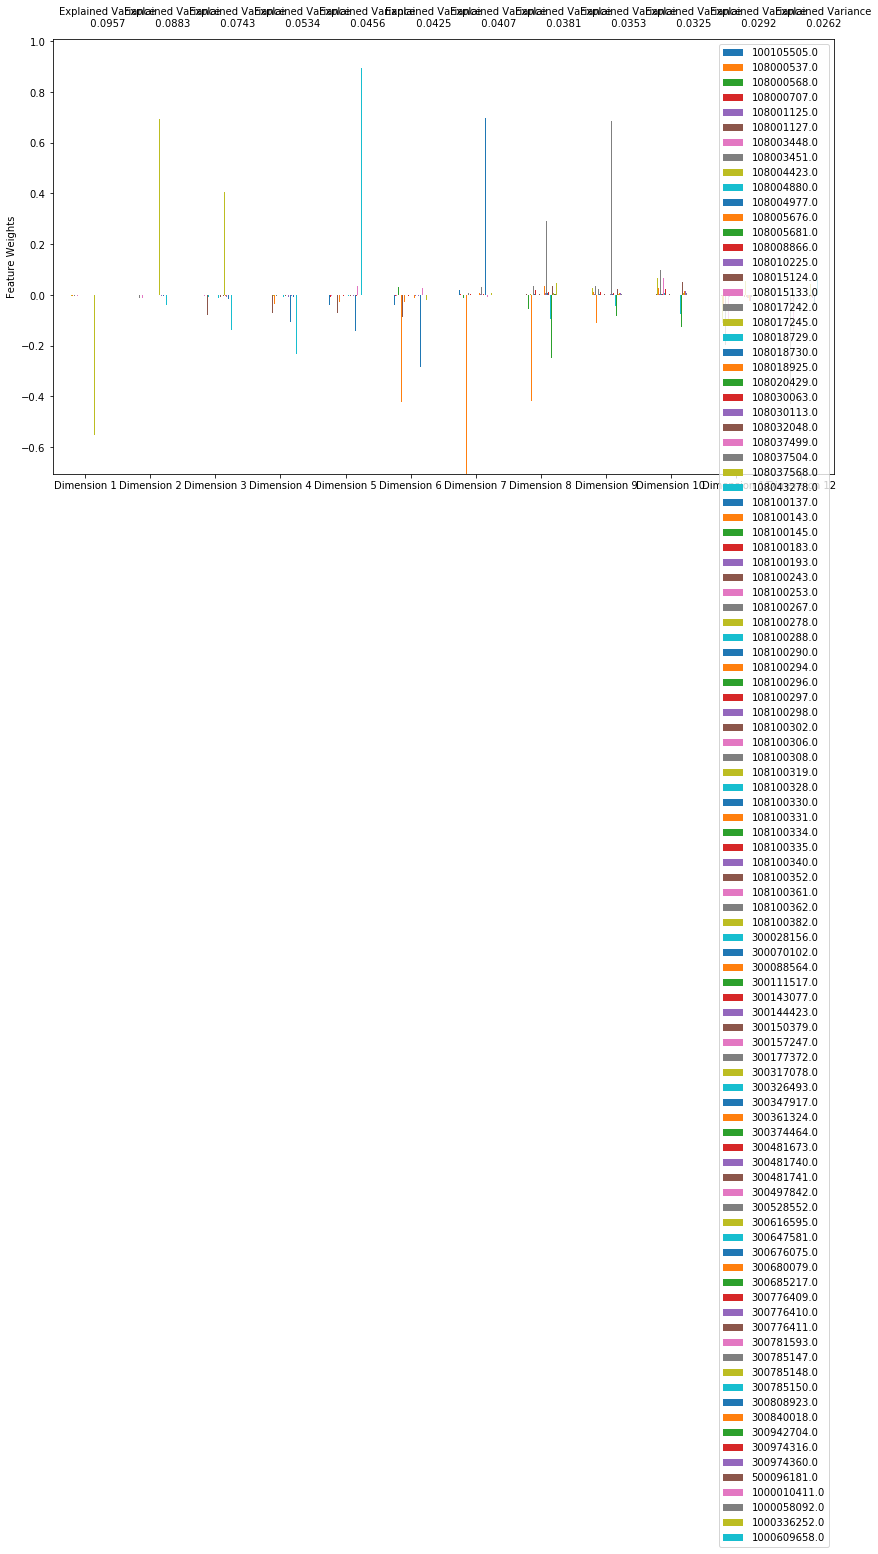

In [23]:

from sklearn.decomposition import PCA
import visuals as vs
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=12).fit(train_pca)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(train_pca)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(sample_pca)

# Create a DataFrame for the reduced data
#reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

pca_results = vs.pca_results(train_pca, pca)

print(pca_results['Explained Variance'].cumsum())


,Explained Variance,100105505.0,108000537.0,108000568.0,108000707.0,108001125.0,108001127.0,108003448.0,108003451.0,108004423.0,...,300808923.0,300840018.0,300942704.0,300974316.0,300974360.0,500096181.0,1000010411.0,1000058092.0,1000336252.0,1000609658.0
Dimension 1,0.0957,-0.0072,-0.0000,-0.0001,-0.0021,-0.0003,-0.0004,-0.0018,-0.0002,-0.0044,...,-0.0022,-0.0020,-0.0007,-0.0002,-0.0019,-0.0003,-0.0001,-0.0008,-0.0048,-0.0142
Dimension 2,0.0883,-0.0197,-0.0001,-0.0004,-0.0055,-0.0007,-0.0010,-0.0049,-0.0005,-0.0120,...,-0.0058,-0.0052,-0.0018,-0.0005,-0.0052,-0.0008,-0.0003,-0.0021,-0.0129,-0.0407


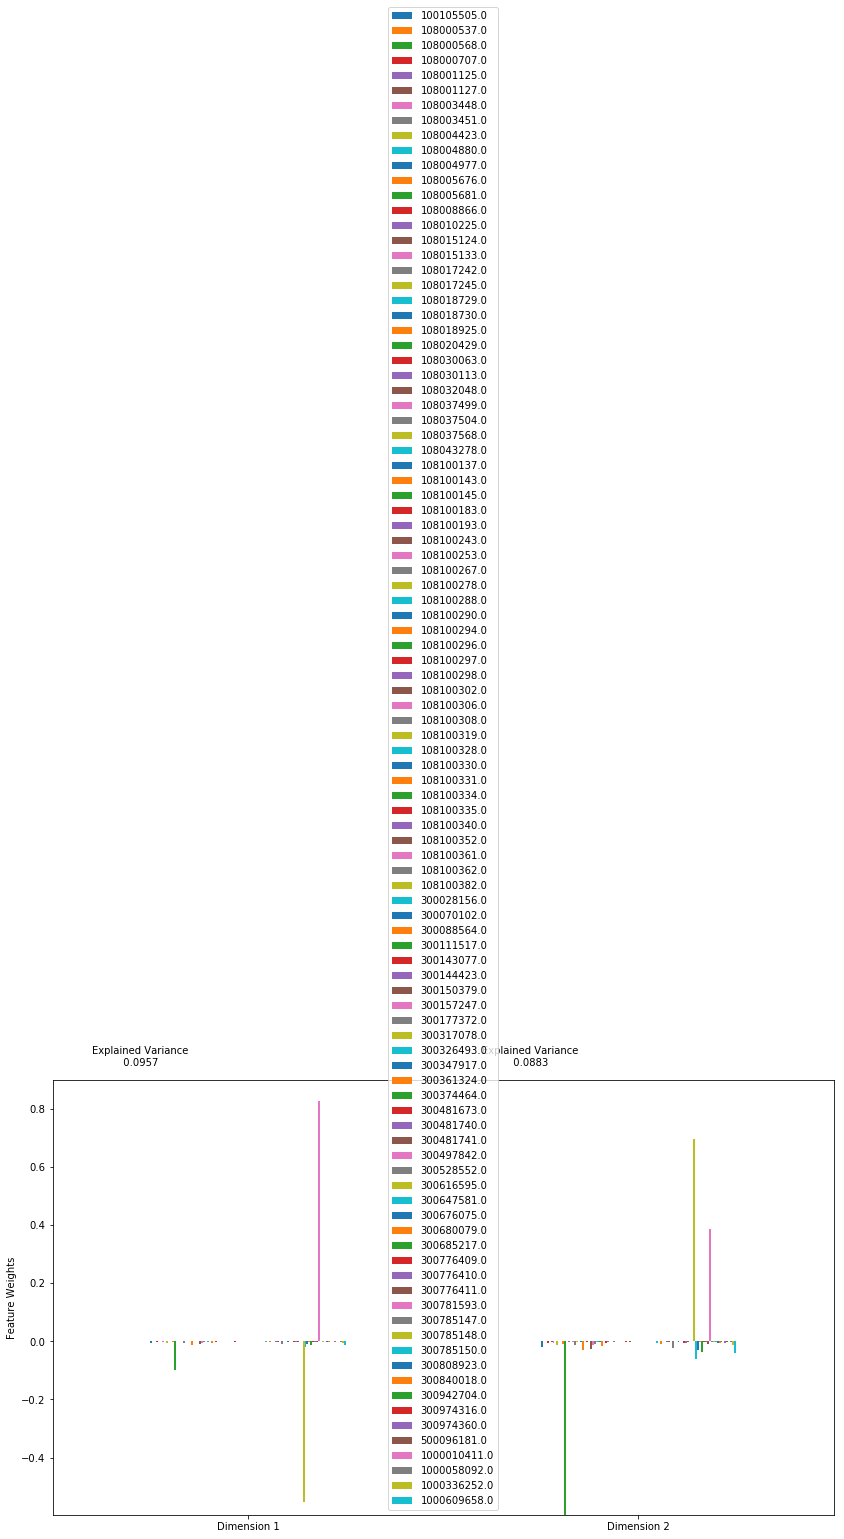

In [24]:
# TODO: Apply PCA by fitting the good data with only two dimensions
pca = PCA(n_components=2).fit(train_pca)

# TODO: Transform the good data using the PCA fit above
reduced_data = pca.transform(train_pca)

# TODO: Transform log_samples using the PCA fit above
pca_samples = pca.transform(sample_pca)

# Create a DataFrame for the reduced data
reduced_data = pd.DataFrame(reduced_data, columns = ['Dimension 1', 'Dimension 2'])

vs.pca_results(train_pca, pca)

In [ ]:
# Create a biplot
vs.biplot(train_pca, reduced_data, pca)

In [25]:
from sklearn.mixture import GaussianMixture 
from sklearn.metrics import silhouette_score
from IPython.display import display # Allows the use of display() for DataFrames

def silhouette(k):
    global clusterer, preds, centers, sample_preds
    
    # Apply your clustering algorithm of choice to the reduced data 
    clusterer = GaussianMixture(n_components=k, random_state=0)
    clusterer.fit(reduced_data.head(10000))

    # Predict the cluster for each data point
    preds = clusterer.predict(reduced_data.head(10000))

    # Find the cluster centers
    centers = clusterer.means_ 
    
    # Predict the cluster for each transformed sample data point
    sample_preds = clusterer.predict(pca_samples)

    # Calculate the mean silhouette coefficient for the number of clusters chosen
    score = silhouette_score(reduced_data.head(10000),preds)
    return score

results = pd.DataFrame(columns=['Silhouette Score'])
results.columns.name = 'Number of Clusters'    
for k in range(2,20):
    score = silhouette(k) 
    results = results.append(pd.DataFrame([score],columns=['Silhouette Score'],index=[k]))

display(results)

Number of Clusters,Silhouette Score
2,0.944365
3,0.981985
4,0.779175
5,0.712428
6,0.708890
7,0.772728
8,0.772728
9,0.759194
10,0.759194
11,0.771953


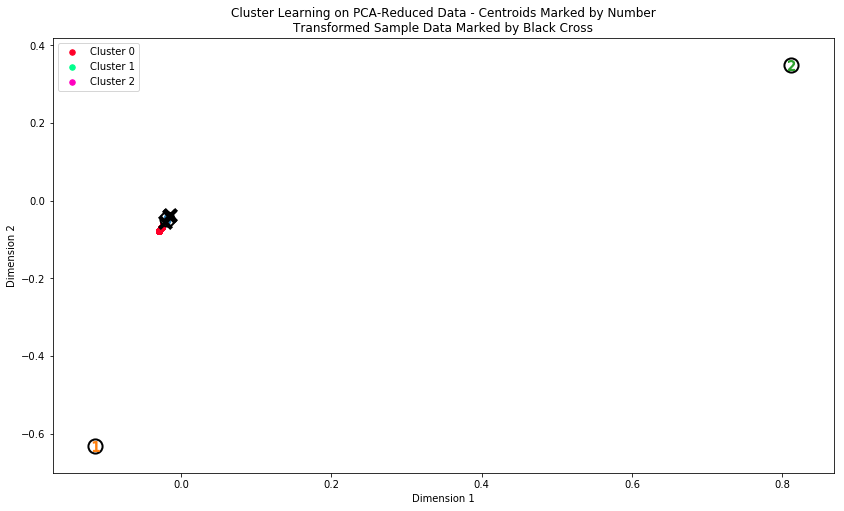

In [26]:
#Optimum silhouette score
silhouette(3)

# Display the results of the clustering from implementation
vs.cluster_results(reduced_data, preds, centers, pca_samples)

In [27]:
# TODO: Inverse transform the centers
true_centers = pca.inverse_transform(centers)



# Display the true centers
segments = ['Segment {}'.format(i) for i in range(0,len(centers))]
true_centers = pd.DataFrame(np.round(true_centers), columns = train_pca.keys())
true_centers.index = segments
display(true_centers)

,100105505.0,108000537.0,108000568.0,108000707.0,108001125.0,108001127.0,108003448.0,108003451.0,108004423.0,108004880.0,...,300808923.0,300840018.0,300942704.0,300974316.0,300974360.0,500096181.0,1000010411.0,1000058092.0,1000336252.0,1000609658.0
Segment 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
true_centers

,100105505.0,108000537.0,108000568.0,108000707.0,108001125.0,108001127.0,108003448.0,108003451.0,108004423.0,108004880.0,...,300808923.0,300840018.0,300942704.0,300974316.0,300974360.0,500096181.0,1000010411.0,1000058092.0,1000336252.0,1000609658.0
Segment 0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Segment 2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [29]:
# Display the predictions
for i, pred in enumerate(sample_preds):
    print ("Sample point", i, "predicted to be in Cluster", pred)

Sample point 0 predicted to be in Cluster 0
Sample point 1 predicted to be in Cluster 0
Sample point 2 predicted to be in Cluster 0


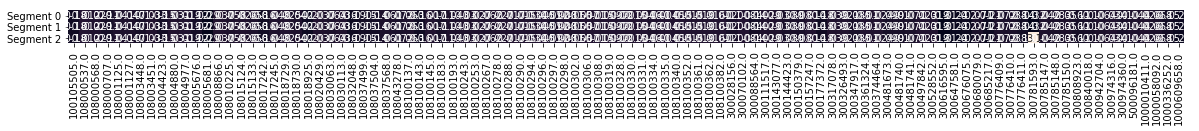

In [30]:
#plt.figure(figsize=(20,10))
#sns.heatmap((true_centers-train_pca.mean())/train_pca.std(ddof=0),
#            square=True, annot=True, cbar=False)


In [31]:
test = test[['customerID']]

In [32]:
true = deepcopy(true_centers)

In [35]:
users = products_less['customerID'].tolist()
#true.drop('customerID', axis=1, inplace=True)

items = true.columns.tolist()
u = {}
for i in range(len(users)):
    u[users[i]] = i

trueMat = np.array(true)
print("users dict formed")

users dict formed


In [36]:
train.head()

,100105505.0,108000537.0,108000568.0,108000707.0,108001125.0,108001127.0,108003448.0,108003451.0,108004423.0,108004880.0,...,300808923.0,300840018.0,300942704.0,300974316.0,300974360.0,500096181.0,1000010411.0,1000058092.0,1000336252.0,1000609658.0
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
def reorder(train):
    train.index = train['customerID'].tolist()
    train.drop('customerID', axis=1, inplace=True)
    train = train.reindex(users)
    return train

In [ ]:
train = reorder(train)

In [38]:
def svd(train, trueMat, k):
    utilMat = np.array(true)

    mask = np.isnan(utilMat)
    masked_arr=np.ma.masked_array(utilMat, mask)
    item_means=np.mean(masked_arr, axis=0)
    utilMat = masked_arr.filled(item_means)

    x = np.tile(item_means, (utilMat.shape[0],1))

    utilMat = utilMat - x

    print(utilMat)

    U, s, V=np.linalg.svd(utilMat, full_matrices=False)
    s=np.diag(s)
    s=s[0:k,0:k]
    U=U[:,0:k]
    V=V[0:k,:]

    s_root=sqrtm(s)

    Usk=np.dot(U,s_root)
    skV=np.dot(s_root,V)
    UsV = np.dot(Usk, skV)

    UsV = UsV + x

    UsV = np.ma.masked_where(trueMat==1,UsV).filled(fill_value=-999)

    #print(UsV)
    print("svd done")
    return UsV

In [39]:
def max_items(UsV,x,j):
    out = []

    for xx in x:
        if UsV[j,xx]>0.001: # setting a threshold
            out.append(items[xx])
        
    if len(out) < 20:
        for j in range(20 - len(out)):
            out.append("None")
        

    return out




In [41]:
def recommend(test):

    UsV = (5*svd(train=true,trueMat=trueMat,k=14) + 5*svd(train=true, trueMat=trueMat, k=14))/10

    pred = []
    testusers = test['customerID'].tolist()

    n = 20
    for user in testusers[:]:
        if user not in u:
            pred.append("300776411,300776410,108037568,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None,None")
            test['products'] = pd.Series(pred)
        else:
            j = u[user]
            p = max_items(UsV, UsV[j,:].argsort()[-n:][::-1], j)
            pred.append(",".join(p))
            print(len(p))
            test['products'] = pd.Series(pred)
    #test['products'] = pred
    test.to_csv('sub_new_k14_pca.csv', index=False)


In [42]:
recommend(test)

[[0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  -0.3333333333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0
  -0.3333333333333333 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0]
 [0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 -0.0 0.0 0.0 0.0 0.0 0.0
  0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 

IndexError: index 1239175 is out of bounds for axis 0 with size 3